In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

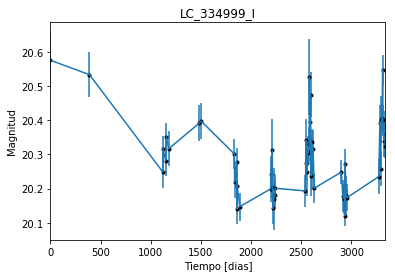

In [2]:
data = np.genfromtxt('LC_334999_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_334999_I')
plt.savefig("LC_334999_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

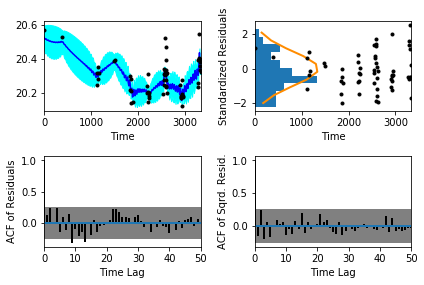

In [5]:
sample.assess_fit()

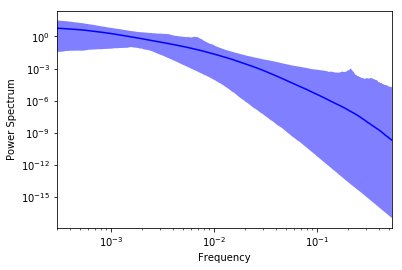

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

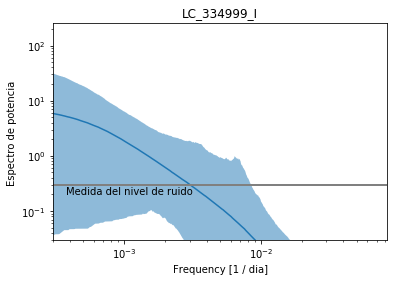

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_334999_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_334999_I')

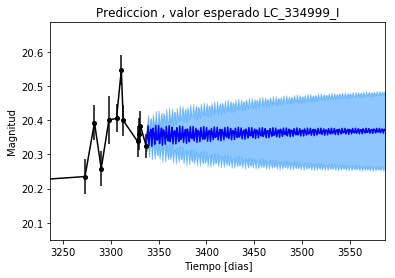

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_334999_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_334999_I')

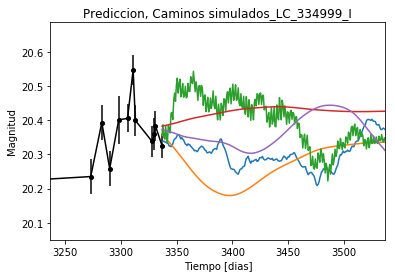

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_334999_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


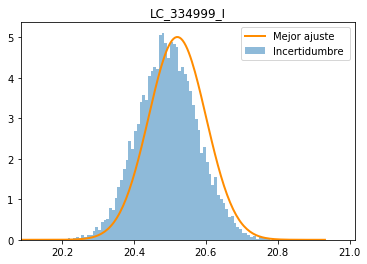

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_334999_I')
plt.savefig("Mejor_ajuste_LC_334999_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_334999_I')

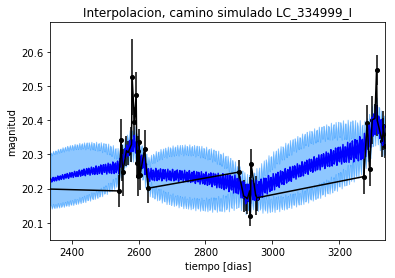

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_334999_I')

Text(0.5,1,'Interpolacion, camino simulado LC_334999_I')

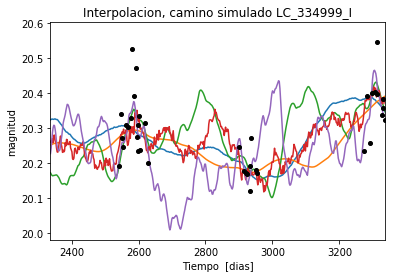

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_334999_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 706.346552309
Median: 0.0107009063453
Standard deviation: 0.179550461859
68% credibility interval: [ 0.00114498  0.14933918]
95% credibility interval: [  3.78883633e-04   7.22611656e-01]
99% credibility interval: [  3.21661631e-04   9.73022830e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1217.59530417
Median: 0.00416743509085
Standard deviation: 0.087965761153
68% credibility interval: [ 0.0006159   0.04063765]
95% credibility interval: [ 0.00033945  0.29693673]
99% credibility interval: [  3.08639379e-04   5.87848419e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 251.262657032
Median: 0.0502164952874
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 912.082967527
Median: 95.3800941105
Standard deviation: 1.68862495461
68% credibility interval: [ 93.5470724   96.69929846]
95% credibility interval: [ 91.33858505  97.97335285]
99% credibility interval: [ 89.28705928  98.84393751]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 461.640252881
Median: 0.935711013349
Standard deviation: 2.24719593097
68% credibility interval: [ 0.11471323  4.36619644]
95% credibility interval: [ 0.02098439  7.47793695]
99% credibility interval: [  0.01210734  10.36477584]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 864.105576957
Median: 1.34163861603
Standard deviation: 10.1281262625
68% credibility interval: [  0.03312119  13.02883679]
95% credibility interval: [  3.17927938

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2378.2704019
Median: 1.04821049647e-42
Standard deviation: 9.20399298725e+124
68% credibility interval: [  6.38780325e-83   9.51829598e-11]
95% credibility interval: [  1.26801657e-154   8.59160918e+046]
99% credibility interval: [  4.11244886e-177   5.32089765e+118]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1162.08956932
Median: 20.3164042922
Standard deviation: 0.0620298554874
68% credibility interval: [ 20.26905529  20.38070793]
95% credibility interval: [ 20.2161122   20.45799916]
99% credibility interval: [ 20.16778612  20.52577023]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 964.58218443
Median: 0.0511926675822
Standard deviation: 0.275176631155
68% credibility interval: [ 0.          0.48609275]
95% credibility interval: [ 0.          0.94049517]
99% credibility interval: [ 0.          1.04136557]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 964.58218443
Median: 0.0511926675822
Standard deviation: 0.275176631155
68% credibility interval: [ 0.          0.48609275]
95% credibility interval: [ 0.          0.94049517]
99% credibility interval: [ 0.          1.04136557]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 474.627740865
Median: 0.0
Standard deviation: 0.00148318753913
68% credi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 912.082967527
Median: 95.3800941105
Standard deviation: 1.68862495461
68% credibility interval: [ 93.5470724   96.69929846]
95% credibility interval: [ 91.33858505  97.97335285]
99% credibility interval: [ 89.28705928  98.84393751]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2697.66743702
Median: 0.0151797121187
Standard deviation: 0.0154050005599
68% credibility interval: [ 0.00834404  0.02751134]
95% credibility interval: [ 0.00490705  0.05282164]
99% credibility interval: [ 0.00345159  0.08986918]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 835.226892057
Median: 1.2390876376
Standard deviation: 0.209460179798
68% credibility interval: [ 1.05728462  1.46533122]
95% credibility interval: [ 0.88645294  1.72139849]
99% credibility interval: [ 0.77460168  1.87985097]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 569.996254485
Median: 0.0010377745752
Standard deviation: 0.205153557228
68% credibility interval: [  4.21820349e-06   4.38148498e-02]
95% credibility interval: [  4.01587440e-50   6.61263168e-01]
99% credibility interval: [  3.07259808e-120   1.47135392e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 706.346552309
Median: (-0.0672357775223-1.49849664196j)
Standard deviation: 2.0644882046
68% credibility interval: [-0.93832575-5.49431538j -0.00719409-1.66608453j]
95% credibility interval: [ -4.54030294e+00-3.6124504j   -2.38059608e-03-0.04001831j]
99% credibility interval: [ -6.11368275e+00+0.j          -2.02105963e-03-3.26176849j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1217.59530417
Median: (-0.0261847669315+4.86225880578j)
Standard deviation: 1.81517899723
68% credibility interval: [-0.25533388+1.64695938j -0.00386979+3.56140758j]
95% credibility interval: [-1.86570851+5.80864984j -0.00213280+0.j        ]
99% credibility interval: [ -3.69356055e+00+1.73369178j  -1.93923841e-03+0.j        ]
Posterior summa